In [1]:
import pandas as pd
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
def read_task_set_from_txt(file):
    task_set = []
    with open(file, 'r') as txtfile:
        for line in txtfile:
            task = tuple(map(int, line.strip()[1:-1].split(', ')))
            task_set.append(task)
    return task_set

In [3]:
data=read_task_set_from_txt('task_set.txt')
df = pd.DataFrame(data, columns=['id', 'execution', 'arrival', 'period', 'dead'])
df['rem']=df['execution']
df['nextdead']=df['period']
df=df.drop(columns=['dead'])
# Print the DataFrame
print(df)

    id  execution  arrival  period  rem  nextdead
0    1         13        0     413   13       413
1    2         18        0     304   18       304
2    3         12        0     474   12       474
3    4         13        0     161   13       161
4    5         12        0     324   12       324
5    6         22        0     162   22       162
6    7         13        0     499   13       499
7    8         15        0     380   15       380
8    9         19        0     327   19       327
9   10         13        0     139   13       139
10  11         14        0     371   14       371
11  12         13        0     460   13       460
12  13         30        0     282   30       282
13  14         11        0     467   11       467
14  15         26        0     312   26       312


In [4]:
sc=[]
for i in range(500):
        task=df[df["arrival"] <= i][df["rem"] > 0]
        if len(task)>0:
            nexttask=task.sort_values('period').index[0]
            df.loc[nexttask, "rem"] -= 1.0
            if i > 0 and sc[-1]['id'] == df.loc[nexttask, "id"] and sc[-1]['end time'] == i:
                sc[-1]['end time'] += 1
                sc[-1]['total time'] += 1
            else:
                dict={'id': df.loc[nexttask, "id"], 'start time': i, 'end time': i + 1, 'total time': 1}
                sc.append(dict)
        arrived=df[(i+1)%df['period']==0].index
        df.loc[arrived, 'rem'] = df.loc[arrived, 'execution']
        df.loc[arrived, 'nextdead'] = df.loc[arrived, 'nextdead']+df.loc[arrived,'period']
        #print("i=",i)
        #print(df)

In [5]:
sc1=pd.DataFrame(sc)
sc1

,id,start time,end time,total time
0,10,0,13,13
1,4,13,26,13
2,6,26,48,22
3,13,48,78,30
4,2,78,96,18
5,15,96,122,26
6,5,122,134,12
7,9,134,139,5
8,10,139,152,13
9,9,152,161,9


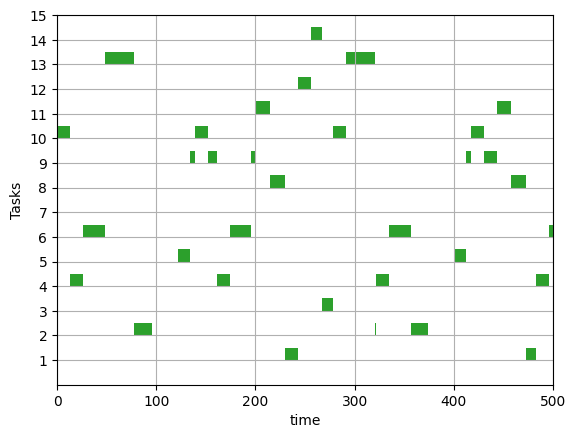

In [6]:
import matplotlib.pyplot as plt
fig, gnt = plt.subplots()
gnt.set_ylim(0, 50)
gnt.set_xlim(0, 500)
gnt.set_xlabel('time')
gnt.set_ylabel('Tasks')

tick=10
tc=[]
lab=[]
for i in df['id']:
    tc.append(tick)
    lab.append(i)
    tick+=10

gnt.set_yticks(tc)
gnt.set_yticklabels(lab)
gnt.grid(True)

for item in sc:
    gnt.broken_barh([(item['start time'], item['end time']-item['start time'])], (10*item['id'], 5), facecolors =('tab:green'))


